## Fundamental of Music Processing (FMP) のインストール

FMP Notebooks をダウンロードする

[https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_GetStarted.html](https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_GetStarted.html)

conda 環境を作成する

`$ conda env create -f FMP_1/environment.yml`

Avtivate

`$ conda activate FMP`

## Python Audio

オーディオファイルの読み書きにはいくつかの方法がある


### LibROSA

- librosa.load は デフォルトのサンプリング周波数が 22050 Hz になる。 `sr=None` でネイティブのサンプリング周波集が維持される。
- 読み込まれたオーディオは、[-1, 1]の範囲の音量のfloat値に変換される。
- librosa.load は PySoundFile か audioread のラッパーである。
- librosa.load は 最初に PySoundFile での読み込みを試みる。これはたくさんのオーディオフォーマットに対応しているが、MP3は対応していない。オーディオファイルの読み込みに失敗すると、librosa.load は audioread を呼び出す。もし ffmpeg があれば、MP3が読み込める。

In [3]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd


f = 'Sounds/440.wav'
x, Fs = librosa.load(f, sr=None)

# soundfie information
print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))

# plot
plt.figure(figsize=(9,2))
plt.plot(x, color='gray')
plt.xlim([0, x.shape[0]])
plt.show()

# player
ipd.display(ipd.Audio(data=x, rate=Fs))


Fs = 48000, x.shape = (517154,), x.dtype = float32


<Figure size 900x200 with 1 Axes>

### PySoundFile

soundfile.read および soundfile.write でオーディオファイルの読み書きができる

- オーディオファイは[-1, 1]の範囲のfloat値に変換される。`dtype` キーワードで変更できる。
- デフォルトで 符号付き16bit PCM (`subtype='PCM_16'`) で書き込まれる。
- リサンプリングはできない。
- MP3の読み込みはできない。

Fs = 8000, x.shape = (8000,), x.dtype = float64


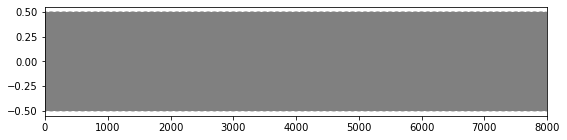

In [32]:
import soundfile as sf

f = 'Sounds/output.wav'
x, Fs = sf.read(f)

# soundfie information
print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))

# plot
plt.figure(figsize=(9,2))
plt.plot(x, color='gray')
plt.xlim([0, x.shape[0]])
plt.show()

# player
ipd.display(ipd.Audio(data=x, rate=Fs))


In [33]:
# オーディオ生成
import numpy as np

Fs = 8000
x = 0.5 * np.cos(2 * np.pi * 440 * np.arange(0, Fs) / Fs)

out = 'Sounds/output.wav'
sf.write(out, x, Fs, subtype='PCM_16')

ipd.display(ipd.Audio(data=x, rate=Fs))


## Wrapper Function in libfmp

`$ pip install libfmp`

Fs = 8000, x.shape = (8000,), x.dtype = float32


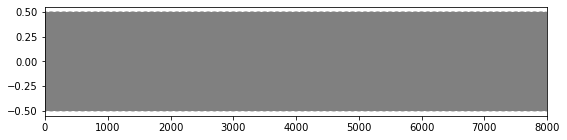

In [34]:
import libfmp.b

f = 'Sounds/output.wav'
x, Fs = libfmp.b.read_audio(f)

# soundfie information
print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))

# plot
plt.figure(figsize=(9,2))
plt.plot(x, color='gray')
plt.xlim([0, x.shape[0]])
plt.show()

# player
ipd.display(ipd.Audio(data=x, rate=Fs))